# Data Analysis in real world.

## NumPy and Pandas are Libs.

In [4]:
import numpy as np
import pandas as pd

In [1]:
print("Test")

Test


Standard Python list

In [10]:
py_list = [1,2,3,4,5]
print(list)

[1, 2, 3, 4, 5]


You can not do mathematical operations on such lists.

In [11]:
# Let us try to add something to this list
py_list + 5

TypeError: can only concatenate list (not "int") to list

## Numpy

In [12]:
arr = np.array(py_list)
arr

array([1, 2, 3, 4, 5])

In [7]:
arr + 5

array([ 6,  7,  8,  9, 10])

In [8]:
type(arr)

numpy.ndarray

In [13]:
type(py_list)

list

In [14]:
print(type(py_list))

<class 'list'>


In [15]:
arr.shape

(5,)

In [16]:
arr.size

5

You can do mathematical operations on numpy array (n-dim array) 

In [17]:
arr + 5

array([ 6,  7,  8,  9, 10])

In [18]:
arr * 3

array([ 3,  6,  9, 12, 15])

In [19]:
(6 + arr * 9) / 3

array([ 5.,  8., 11., 14., 17.])

In [22]:
arr_2 = np.arange(8)
arr_2

array([0, 1, 2, 3, 4, 5, 6, 7])

In [23]:
arr_3 = np.arange(15, 32, 2)
arr_3

array([15, 17, 19, 21, 23, 25, 27, 29, 31])

In [25]:
arr_4 = np.arange(20, 39, 2)
arr_4

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38])

In [26]:
arr_4.mean()

29.0

In [27]:
arr_4.size

10

In [28]:
arr_4.max()

38

In [29]:
arr_4.min()

20

### Filtering
comparisons are boolean ops. 

In [31]:
arr_4 

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38])

### Indexing

In [32]:
arr_4 > 25

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True])

In [33]:
arr_4 [5]

30

In [34]:
arr_4[arr_4>25]

array([26, 28, 30, 32, 34, 36, 38])

## Let us try with real data

Normally how we read file in python

In [36]:
file = open('./Dataset/NPStimeseries.csv')
count = 0
for i in file:
    if count > 10:
        break
    print(i)
    count+=1

ID,Market,Survey date,Customer Name,Month,Quarter,NPS

1000,US,01/09/2021,Krista Richards,9,3,10

1001,MEX,07/11/2021,Monica King,11,4,9

1002,UK,25/12/2021,Ricky Armstrong,12,4,0

1003,UK,01/10/2021,Andrea Foley,10,4,10

1004,UK,01/03/2021,Jerry Garcia,3,1,8

1005,US,06/05/2021,Jimmy Rojas,5,2,10

1006,MEX,19/08/2021,Jonathan Johnson,8,3,10

1007,US,28/03/2021,Brandy Kelley,3,1,4

1008,US,07/04/2021,Jay Hernandez,4,2,8

1009,US,23/02/2021,Katelyn Smith,2,1,10


In [37]:
npar = np.loadtxt("./Dataset/NPStimeseries.csv", delimiter=",",dtype=str)
npar

array([['ID', 'Market', 'Survey date', ..., 'Month', 'Quarter', 'NPS'],
       ['1000', 'US', '01/09/2021', ..., '9', '3', '10'],
       ['1001', 'MEX', '07/11/2021', ..., '11', '4', '9'],
       ...,
       ['5997', 'UK', '07/01/2021', ..., '1', '1', '8'],
       ['5998', 'UK', '14/10/2021', ..., '10', '4', '8'],
       ['5999', 'MEX', '17/12/2021', ..., '12', '4', '9']], dtype='<U26')

In [38]:
npar_another = np.genfromtxt("./Dataset/NPStimeseries.csv", delimiter=",",dtype=str)
npar_another

array([['ID', 'Market', 'Survey date', ..., 'Month', 'Quarter', 'NPS'],
       ['1000', 'US', '01/09/2021', ..., '9', '3', '10'],
       ['1001', 'MEX', '07/11/2021', ..., '11', '4', '9'],
       ...,
       ['5997', 'UK', '07/01/2021', ..., '1', '1', '8'],
       ['5998', 'UK', '14/10/2021', ..., '10', '4', '8'],
       ['5999', 'MEX', '17/12/2021', ..., '12', '4', '9']], dtype='<U26')

## Analysis of NPS
Let us extract one column out of the entire table

In [53]:
scores = npar[:,6] # 7th column
scores

array(['NPS', '10', '9', ..., '8', '8', '9'], dtype='<U26')

In [54]:
scores.size

5001

In [55]:
type(scores)

numpy.ndarray

But is this numerical?

In [56]:
type(scores[2])

numpy.str_

In [57]:
scores.mean() # so we can not do numerical ops 

TypeError: cannot perform reduce with flexible type

Let us convert them to float

In [58]:
scores = scores.astype(float)

ValueError: could not convert string to float: 'NPS'

The first entry in the table is a string (Column Head). So before converting to float, let us remove head, extract rest of the array.

In [59]:
scores = scores[1:]
scores

array(['10', '9', '0', ..., '8', '8', '9'], dtype='<U26')

In [60]:
scores = scores.astype(float)

In [61]:
scores.mean()

6.8412

In [62]:
scores.size

5000

In [63]:
scores.min()

0.0

In [64]:
scores.max()

10.0

# NPS
![NPS](https://www.productplan.com/uploads/2019/01/net-promoter-score-scale.png)

Net Promoter Score scores can range from -100 (all detractors and no promoters) to 100 (all promoters and no detractors). The closer to 100, the better.

## The Net Promoter Score scale
The score comes from the NPS question, which is:

> “On a scale of 0 to 10, how likely is it that you would recommend our organization to a friend or colleague?”

Based on the number a customer chooses, they’re classified into one of the following categories: “Detractors,” “Passives,” and “Promoters.”

### Score breakdowns:
- 0 – 6: Detractors: This group represents unhappy customers who are unlikely to buy from you again. Detractors can discourage consumers from buying into your business, which is why it is important to pay close attention to this category. You can address this group of customers with insights that will help you understand why their shopping experience was unfavorable, which turns into valuable information you can use to improve your business. Once you’ve made the necessary changes to accommodate those pain points, you can calculate another NPS 3–6 months later to determine if the changes you made worked. 
- 7 – 8: Passives: This group represents customers who had no issue with their customer experience, but they weren’t exactly impressed enough to become a promoter. Passives are a “take it or leave it” type of customer, meaning they may buy your product or service again, but will quickly go to a competitor if the price is right or if there’s an extra feature that appeals to them. Because of this, Passives can easily become a Detractor by default, but the good news is they can just as easily become a Promoter. 
- 9  – 10: Promoters: This category means you’re winning because you have a high percentage of promoters who are referring your business to consumers. Promoters are the most cost-efficient way to advertise and the way to get more Promoters is by making your customers’ experience as pleasant as possible. Still, if you find that most of your customers are Promoters, there’s still work to do. This category of customers offers you the advantage of discovering what more you can do to improve your satisfied customers’ buying experience. Learning how to calculate NPS can help prevent Promoters from falling into the category of Passives.
You can think of the NPS system as similar to a four-star system on an online review, but the NPS scale gives you a broader way (and a more accurate method) to measure customer’s opinions.

## Net Promoter Score (NPS) formula 
**(Number of Promoters — Number of Detractors) / (Number of Respondents) x 100**

### NPS calculation example 
Example: If you received 100 responses to your survey:

- 10 responses were in the 0–6 range (Detractors)
- 20 responses were in the 7–8 range (Passives)
- 70 responses were in the 9–10 range (Promoters)

- When you calculate the percentages for each group, you get 10%, 20%, and 70% respectively.

To finish up, subtract 10% (Detractors) from 70% (Promoters), which equals 60%. Since an example Net Promoter Score is always shown as just an integer and not a percentage, your NPS is simply 60. (And yes, you can have a negative NPS, as your score can range from -100 to +100.)

Businesses will bring their subjective views to their net promoter scores, and these scores can be open to interpretation. But here is a good rule of thumb:
- 70 or more: outstanding
- 50 to 69: strong
- 49 or less: needs improvement
- Below 0: **red flag!**

In [65]:
# Promoters - filtering through indexing
pros = scores[scores>8]
pros

array([10.,  9., 10., ..., 10., 10.,  9.])

In [67]:
# Detractors
dets = scores[scores<7]
dets

array([0., 4., 0., ..., 2., 3., 1.])

In [68]:
pros.size

2309

In [69]:
dets.size

1719

In [70]:
# NPS
nps = 100 * (pros.size - dets.size)/scores.size
nps

11.8

# Pandas

In [1]:
print("Pandas start")

Pandas start


In [2]:
!wget "https://drive.google.com/uc?export=download&id=1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_" -O ./Dataset/countries_data.csv

--2023-07-03 17:22:40--  https://drive.google.com/uc?export=download&id=1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_
Resolving drive.google.com (drive.google.com)... 2404:6800:4002:81c::200e, 142.250.193.206
Connecting to drive.google.com (drive.google.com)|2404:6800:4002:81c::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eb9qjar2ar6vppiapr71fngigo4tg65v/1688385150000/14302370361230157278/*/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_?e=download&uuid=3db2ae2f-f826-41d6-bac0-cd7a8411b61e [following]
--2023-07-03 17:22:41--  https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eb9qjar2ar6vppiapr71fngigo4tg65v/1688385150000/14302370361230157278/*/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_?e=download&uuid=3db2ae2f-f826-41d6-bac0-cd7a8411b61e
Resolving doc-0s-68-docs.googleusercontent.com (doc-0s-68-docs.googleusercontent.com)... 2404:6800:4002:82c::2

> A Pandas DataFrame (df) is a 2-dimensional data structure, like a 2-dimensional array, or a table with rows and columns.

In [5]:
df = pd.read_csv('./Dataset/countries_data.csv')
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [6]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [7]:
df.tail()

,country,year,population,continent,life_exp,gdp_cap
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298


In [8]:
df.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.size

10224

In [11]:
df.shape

(1704, 6)

In [14]:
1704*6

10224

In [12]:
df.min()

country       Afghanistan
year                 1952
population          60011
continent          Africa
life_exp           23.599
gdp_cap        241.165876
dtype: object

In [13]:
df.max()

country          Zimbabwe
year                 2007
population     1318683096
continent         Oceania
life_exp           82.603
gdp_cap       113523.1329
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [16]:
df['year']

0       1952
1       1957
2       1962
3       1967
4       1972
        ... 
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64

In [17]:
# Filtering
df['year']==2007

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703     True
Name: year, Length: 1704, dtype: bool

In [18]:
df_2007 = df[df['year']==2007]
df_2007

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
1679,"Yemen, Rep.",2007,22211743,Asia,62.698,2280.769906
1691,Zambia,2007,11746035,Africa,42.384,1271.211593


In [19]:
df.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [20]:
df_2007.describe()

,year,population,life_exp,gdp_cap
count,142.0,1.420000e+02,142.000000,142.000000
mean,2007.0,4.402122e+07,67.007423,11680.071820
std,0.0,1.476214e+08,12.073021,12859.937337
min,2007.0,1.995790e+05,39.613000,277.551859
25%,2007.0,4.508034e+06,57.160250,1624.842248
50%,2007.0,1.051753e+07,71.935500,6124.371108
75%,2007.0,3.121004e+07,76.413250,18008.835640
max,2007.0,1.318683e+09,82.603000,49357.190170


### Find country with min life exp in year 2007

In [21]:
df_2007.min()

country       Afghanistan
year                 2007
population         199579
continent          Africa
life_exp           39.613
gdp_cap        277.551859
dtype: object

In [22]:
df_2007['life_exp'] == df_2007['life_exp'].min()

11      False
23      False
35      False
47      False
59      False
        ...  
1655    False
1667    False
1679    False
1691    False
1703    False
Name: life_exp, Length: 142, dtype: bool

In [23]:
df_2007[df_2007['life_exp'] == df_2007['life_exp'].min()]

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


### Find country with the highest GDP per cap in year 2007

In [24]:
df_2007[df_2007['gdp_cap'] == df_2007['gdp_cap'].max()]

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017


### Find the country with the highest gdp per cap ever

In [25]:
df[df['gdp_cap'] == df['gdp_cap'].max()]

,country,year,population,continent,life_exp,gdp_cap
853,Kuwait,1957,212846,Asia,58.033,113523.1329


### Country with minimum population ever in given data and when 

In [26]:
df[df['population'] == df['population'].min()]

,country,year,population,continent,life_exp,gdp_cap
1296,Sao Tome and Principe,1952,60011,Africa,46.471,879.583586


### Country with min population in 2007 

In [27]:
df_2007[df_2007['population'] == df_2007['population'].min()]

,country,year,population,continent,life_exp,gdp_cap
1307,Sao Tome and Principe,2007,199579,Africa,65.528,1598.435089


### Observe population growth of São Tomé and Príncipe in given dataset

In [28]:
unique = df['country'].value_counts() # Not a data frame
unique

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

In [29]:
df['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [30]:
df_stp = df[df['country'] == 'Sao Tome and Principe']
df_stp

,country,year,population,continent,life_exp,gdp_cap
1296,Sao Tome and Principe,1952,60011,Africa,46.471,879.583586
1297,Sao Tome and Principe,1957,61325,Africa,48.945,860.736903
1298,Sao Tome and Principe,1962,65345,Africa,51.893,1071.551119
1299,Sao Tome and Principe,1967,70787,Africa,54.425,1384.840593
1300,Sao Tome and Principe,1972,76595,Africa,56.480,1532.985254
1301,Sao Tome and Principe,1977,86796,Africa,58.550,1737.561657
1302,Sao Tome and Principe,1982,98593,Africa,60.351,1890.218117
1303,Sao Tome and Principe,1987,110812,Africa,61.728,1516.525457
1304,Sao Tome and Principe,1992,125911,Africa,62.742,1428.777814
1305,Sao Tome and Principe,1997,145608,Africa,63.306,1339.076036


In [32]:
df_stp[['year','population']]

,year,population
1296,1952,60011
1297,1957,61325
1298,1962,65345
1299,1967,70787
1300,1972,76595
1301,1977,86796
1302,1982,98593
1303,1987,110812
1304,1992,125911
1305,1997,145608


<AxesSubplot:xlabel='year'>

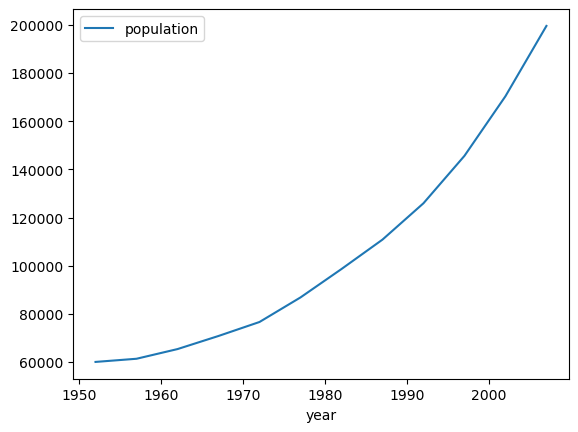

In [36]:
df_stp.plot('year','population')

## India analysis

In [37]:
df_ind = df[df['country'] == 'India']
df_ind

,country,year,population,continent,life_exp,gdp_cap
696,India,1952,372000000,Asia,37.373,546.565749
697,India,1957,409000000,Asia,40.249,590.061996
698,India,1962,454000000,Asia,43.605,658.347151
699,India,1967,506000000,Asia,47.193,700.770611
700,India,1972,567000000,Asia,50.651,724.032527
701,India,1977,634000000,Asia,54.208,813.337323
702,India,1982,708000000,Asia,56.596,855.723538
703,India,1987,788000000,Asia,58.553,976.512676
704,India,1992,872000000,Asia,60.223,1164.406809
705,India,1997,959000000,Asia,61.765,1458.817442


<AxesSubplot:>

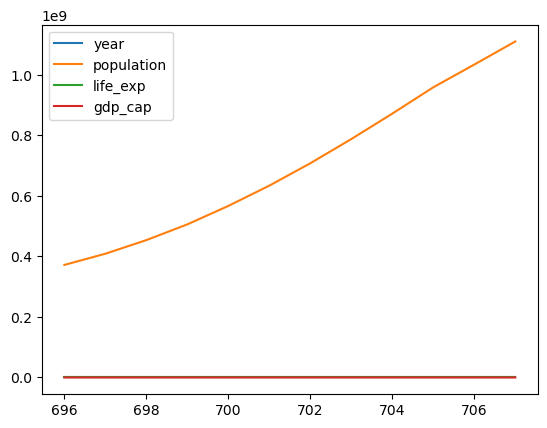

In [38]:
df_ind.plot()

<AxesSubplot:xlabel='year'>

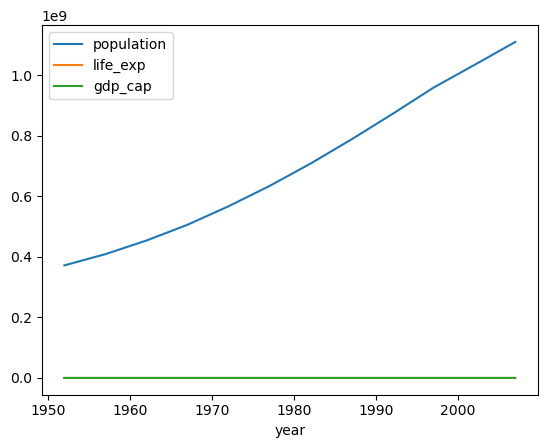

In [39]:
df_ind.plot(x='year')

<AxesSubplot:xlabel='year'>

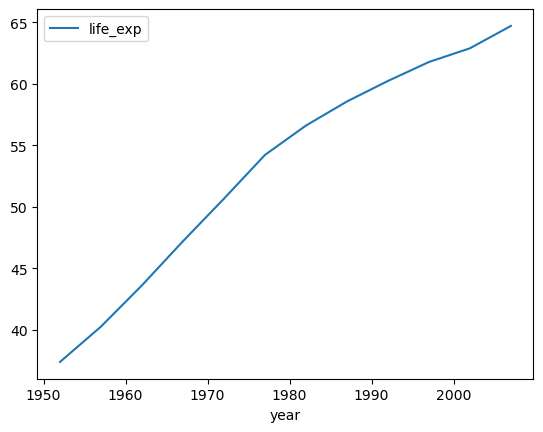

In [40]:
df_ind.plot(x='year',y='life_exp')

<AxesSubplot:xlabel='year'>

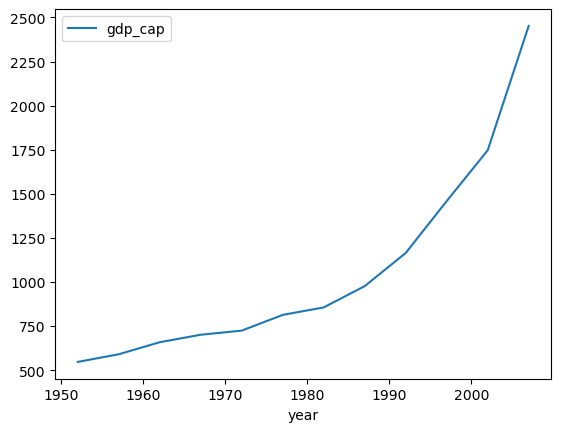

In [41]:
df_ind.plot(x='year',y='gdp_cap')

<AxesSubplot:xlabel='year'>

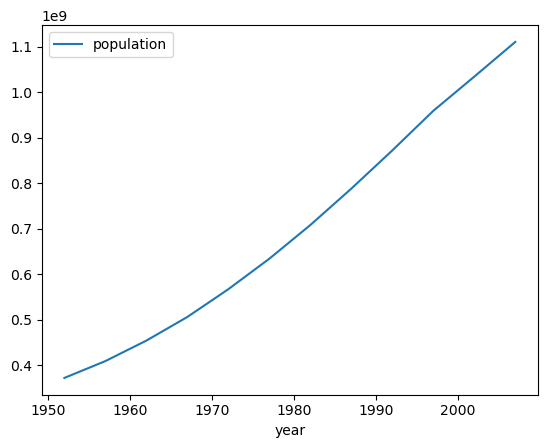

In [42]:
df_ind.plot(x='year',y='population')

## Comparative analysis

<AxesSubplot:xlabel='year'>

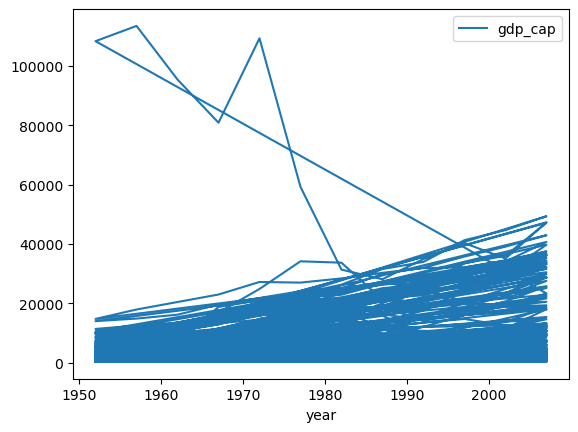

In [43]:
df.plot('year','gdp_cap')

In [45]:
df_asia = df[df['continent']=='Asia']
df_asia

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1675,"Yemen, Rep.",1987,11219340,Asia,52.922,1971.741538
1676,"Yemen, Rep.",1992,13367997,Asia,55.599,1879.496673
1677,"Yemen, Rep.",1997,15826497,Asia,58.020,2117.484526
1678,"Yemen, Rep.",2002,18701257,Asia,60.308,2234.820827


<AxesSubplot:xlabel='year'>

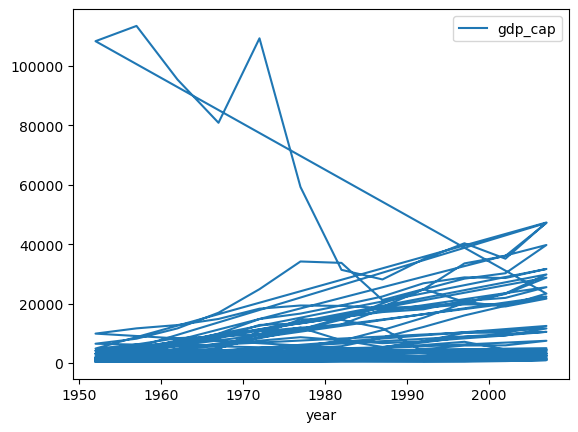

In [46]:
df_asia.plot('year','gdp_cap')

In [47]:
df_pak = df_asia[df_asia['country']=='Pakistan']
df_pak

,country,year,population,continent,life_exp,gdp_cap
1164,Pakistan,1952,41346560,Asia,43.436,684.597144
1165,Pakistan,1957,46679944,Asia,45.557,747.083529
1166,Pakistan,1962,53100671,Asia,47.670,803.342742
1167,Pakistan,1967,60641899,Asia,49.800,942.408259
1168,Pakistan,1972,69325921,Asia,51.929,1049.938981
1169,Pakistan,1977,78152686,Asia,54.043,1175.921193
1170,Pakistan,1982,91462088,Asia,56.158,1443.429832
1171,Pakistan,1987,105186881,Asia,58.245,1704.686583
1172,Pakistan,1992,120065004,Asia,60.838,1971.829464
1173,Pakistan,1997,135564834,Asia,61.818,2049.350521


In [52]:
df_ind_pak = pd.concat([df_ind, df_pak])

In [53]:
df_ind_pak

,country,year,population,continent,life_exp,gdp_cap
696,India,1952,372000000,Asia,37.373,546.565749
697,India,1957,409000000,Asia,40.249,590.061996
698,India,1962,454000000,Asia,43.605,658.347151
699,India,1967,506000000,Asia,47.193,700.770611
700,India,1972,567000000,Asia,50.651,724.032527
701,India,1977,634000000,Asia,54.208,813.337323
702,India,1982,708000000,Asia,56.596,855.723538
703,India,1987,788000000,Asia,58.553,976.512676
704,India,1992,872000000,Asia,60.223,1164.406809
705,India,1997,959000000,Asia,61.765,1458.817442


<AxesSubplot:xlabel='year'>

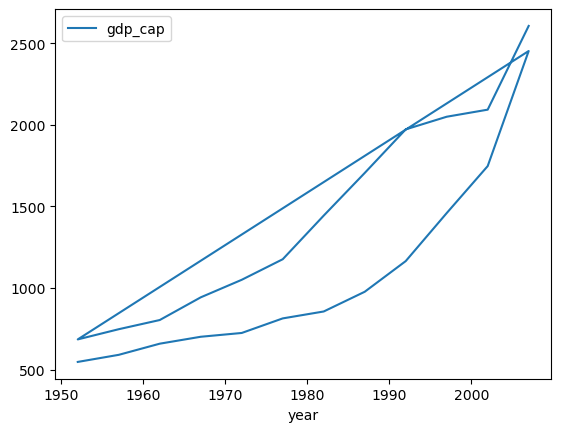

In [54]:
df_ind_pak.plot('year','gdp_cap')

<AxesSubplot:xlabel='year'>

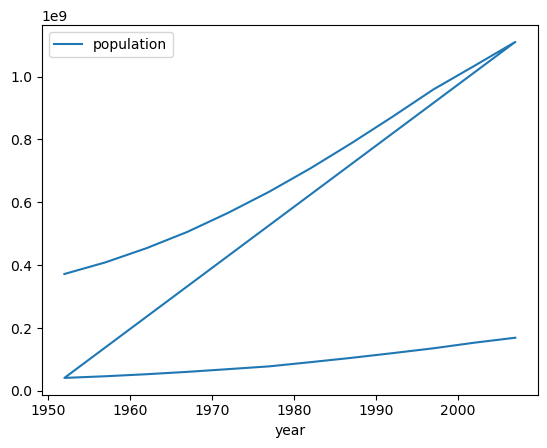

In [55]:
df_ind_pak.plot('year','population')

> Dataframe plot is good for limited cases. As you can see here, It does not work well for comparative analysis, as it keeps its 'pen' down (connecting) different points.  

# Seaborn

In [56]:
import seaborn as sns

In [65]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", palette="pastel", rc = custom_params)

<AxesSubplot:xlabel='year', ylabel='gdp_cap'>

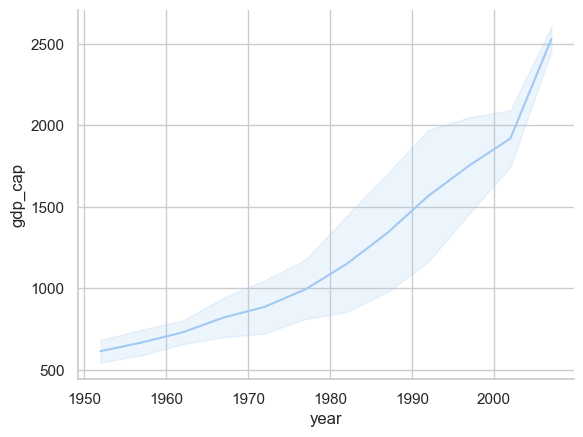

In [66]:
sns.lineplot(data = df_ind_pak, x = "year", y ="gdp_cap")

In [62]:
df_ind.max()

country             India
year                 2007
population     1110396331
continent            Asia
life_exp           64.698
gdp_cap       2452.210407
dtype: object

In [64]:
df_pak.max()

country         Pakistan
year                2007
population     169270617
continent           Asia
life_exp          65.483
gdp_cap       2605.94758
dtype: object

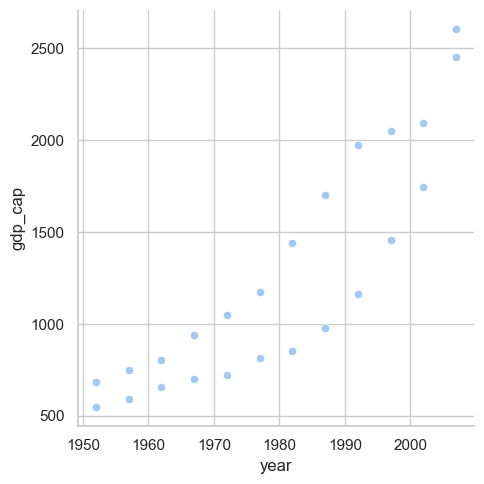

In [69]:
sns.relplot(data = df_ind_pak, x = "year", y ="gdp_cap")

<AxesSubplot:xlabel='year', ylabel='gdp_cap'>

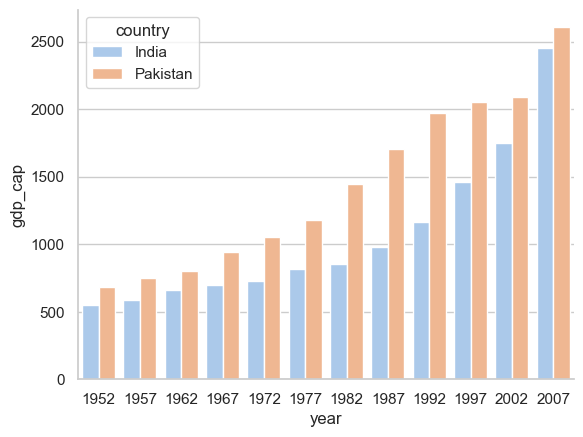

In [71]:
sns.barplot(data = df_ind_pak, x = "year", y ="gdp_cap", hue='country')

<AxesSubplot:xlabel='year', ylabel='gdp_cap'>

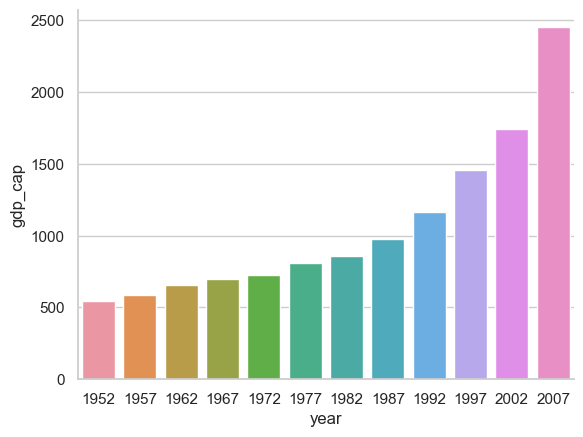

In [72]:
sns.barplot(data = df_ind, x = "year", y ="gdp_cap")